In [1]:
import pandas as pd
import numpy as np

import timeit
import nltk

import scipy.spatial.distance as distance

In [2]:
df = pd.read_csv('datasetG.txt', sep="\n", names=['p1'])

In [3]:
# Se separan las palabras, creando una lista de palabras en vez de un string para luego calcular el vector
df['p1'] = pd.Series([nltk.word_tokenize(x[0]) for x in df.itertuples(index=False)], index=df.index)

In [4]:
#Lo hice en un inicio para quitar : , ... pero luego me acorde que son punctuation, no stopwords, asi que no sirve
#Quita he, to...print stopwords si se quieren ver todas
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
df['p1'] = df['p1'].apply(lambda x: [item for item in x if item not in stopwords])

In [5]:
#Word2Vec
import gensim
start_time = timeit.default_timer()

model = gensim.models.KeyedVectors.load('../../quora/data/GoogleNews-vectors-negative300.bin.gz', mmap=None)

print(timeit.default_timer() - start_time)

Using TensorFlow backend.


38.025925594999535


In [6]:
def feature_vector(tweet, num_features, model):
    #print(tweet)
    words_not_founded = set()
    featureVec = np.zeros((num_features,), dtype="float32")
    vecTweet = {}
    
    for word in tweet:
        if word in model:
            featureVec = np.add(featureVec, model[word])
            vecTweet.update({word : featureVec})
            
        else:
            words_not_founded.add(word)
    #print(words_not_founded)
    return vecTweet

#feature_vector(df['p1'][0], 300, model)

In [7]:
df['vector'] = [feature_vector(row[1], 300, model) for row in df.itertuples()]

In [8]:
df.to_pickle('my_df.pickle')

In [10]:
#recorrer dict df[vector] y coger los values 
alist = []
for i in range(len(df['vector'])):
    alist.append(np.array(list(df['vector'][i].values())))
arr = np.concatenate(alist)

In [11]:
arr

array([[ -3.05466168e-02,  -3.96536812e-02,   3.16849984e-02, ...,
          4.04126048e-02,   1.81382388e-01,  -1.16874009e-01],
       [ -4.73308377e-02,   9.10046324e-02,  -3.04100588e-02, ...,
          1.04851067e-01,   8.06574225e-02,  -1.32625893e-01],
       [  1.26479790e-02,  -2.26095840e-02,   2.98032537e-05, ...,
          4.68515977e-02,  -2.57420540e-03,  -1.77476212e-01],
       ..., 
       [  3.09002437e-02,  -5.40183205e-03,   4.60072234e-03, ...,
         -3.69784050e-03,  -2.64813825e-02,  -1.46334097e-02],
       [  1.67285487e-01,  -1.33092748e-02,  -8.45743995e-03, ...,
         -8.08860958e-02,  -5.29814139e-03,  -4.98904474e-02],
       [  2.03017235e-01,   4.13392708e-02,  -1.08145989e-01, ...,
         -4.71060872e-02,  -2.21881457e-02,  -5.46759479e-02]], dtype=float32)

In [41]:
from sklearn.manifold import TSNE
X_tsne = TSNE(learning_rate=200, perplexity=50).fit_transform(arr)
X_tsne.shape

(592, 2)

Populating the interactive namespace from numpy and matplotlib


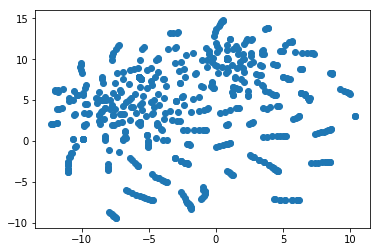

In [42]:
%pylab inline
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [43]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3)
%time labels = kmeans.fit_predict(arr)

CPU times: user 125 ms, sys: 96 µs, total: 125 ms
Wall time: 64.5 ms


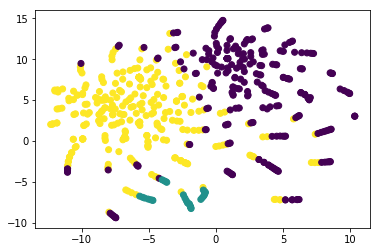

In [44]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)